In [27]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.cluster as hpacl  # Now this should work
import hpa.util as hpau  # Now this should work
import hpa.plots as hpapl

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import gsd.hoomd 
from MDAnalysis.analysis import distances



In [29]:
path_200 = '/localscratch/zippoema/project_ness/simulations/200-tdp43_CAL3/'
path_work = '/localscratch/zippoema/working_dir/'
path_an_200 = '/localscratch/zippoema/project_ness/analysis/200-tdp43_CAL3/'
path_an_dp = '/localscratch/zippoema/project_ness/analysis/condensate_dephospho/'
path_dp = '/localscratch/zippoema/project_ness/simulations/condensate_dephospho/'
path_ness = '/localscratch/zippoema/project_ness/simulations/simple-ness_CAL3/'
path_fix = '/localscratch/zippoema/project_ness/simulations/ness_1-ck1d_1-pp3/'

### Center trajectory

In [38]:
hpau.center_trajectory(path_work+'search_steadystate/search_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd-2000pSer_2-com-ck1d-open_10-com-pp3_CAL3_search_5us_dump.gsd',
                       path_work+'search_steadystate/search_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd-2000pSer_2-com-ck1d-open_10-com-pp3_CAL3_search_5us_dump_centered.gsd')
                       

100%|█████████████████████████████████████████████████████████████████| 1250/1250 [01:05<00:00, 19.01it/s]


In [23]:
hpau.center_trajectory(path_work+'no_driving_slab/sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/sim5_eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_start.gsd',
                       path_work+'no_driving_slab/sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/sim5_eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_start_centered.gsd')


100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.21it/s]


In [6]:
for i in range(1,11):
    hpau.center_trajectory(path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_resize_end.gsd', path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered1.gsd')
    hpau.center_trajectory(path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered1.gsd', path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered.gsd')
    hpau.center_trajectory(path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered.gsd', path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered1.gsd')
    hpau.center_trajectory(path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered1.gsd', path+f'sim_200-tdp43-lcd_CAL3/therm{i}_200-tdp43-lcd_CAL3_centered.gsd')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.17it/s]


In [7]:
!rm /localscratch/zippoema/project_ness/simulations/sim_200-tdp43-lcd_CAL3/therm*_200-tdp43-lcd_CAL3_centered1.gsd

In [36]:
for i in range(1,2):
    hpau.center_trajectory(path_dp+f'sim_200-tdp43-lcd-2800pser_5-pp3/sim{i}_200-tdp43-lcd-2800pser_5-com-pp3_CAL3_10us_dump_centered1.gsd', 
                            path_dp+f'sim_200-tdp43-lcd-2800pser_5-pp3/sim{i}_200-tdp43-lcd-2800pser_5-com-pp3_CAL3_10us_dump_centered.gsd', 
                            )


100%|█████████████████████████████████████████████████████████████████| 2500/2500 [02:11<00:00, 19.04it/s]


### Unwrap trajectory

In [ ]:
hpau.unwrap_trajectory('/localscratch/zippoema/project_ness/analysis/compute_diffusion_dilute/sim_p-tdp43_dump.gsd', mode='rb')


### Modify particle positions

In [40]:
for i in [1]:
    frame_pos = gsd.hoomd.open(path_work+'no_driving_slab/sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_dump.gsd', mode='rb')[-1]
    frame_compl = gsd.hoomd.open('/localscratch/zippoema/project_ness/analysis/compute_diffusion_dilute/snap_p-tdp43.gsd', mode='rb')[0]
    hpau.modify_particles_position(frame_compl, frame_pos, id_start_pos=18633, id_end_pos=18788, 
                                   save='/localscratch/zippoema/project_ness/analysis/compute_diffusion_dilute/snap_p-tdp43_start.gsd')

In [21]:
snap = gsd.hoomd.open(path_200+f'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/sim1_200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_dump.gsd', mode='rb')[1000]
with gsd.hoomd.open(path_work+f'init_conf_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_snap1000.gsd', mode='wb') as f:
    f.append(snap)


In [67]:
for i in [2500]:
    frame_compl = gsd.hoomd.open(path_work+f'search_steadystate/init_search_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_lattice.gsd', mode='rb')[0]
    frame_pos = gsd.hoomd.open(path_work+f'search_steadystate/init_search_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd-{i}pSer_5-ck1d-open_hps-cp-r30.gsd', mode='rb')[0]
    hpau.modify_particles_position(frame_compl, frame_pos, id_end_compl=30800, id_end_pos=30800,
                                   save=path_work+f'search_steadystate/init_search_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_200-tdp43-lcd-{i}pSer_2-com-ck1d-open_10-com-pp3_CAL3_shorttherm_start.gsd')

In [42]:
for i in [2500]:
    frame_pos = gsd.hoomd.open(path_work+'no_driving_slab/sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/sim1_eq_slab_200-tdp43-lcd_2-com-ck1d-open_10-com-pp3_CAL3_dump.gsd', mode='rb')[-1]
    frame_compl = gsd.hoomd.open('/localscratch/zippoema/project_ness/analysis/compute_diffusion_dilute/sim_single-tdp43-lcd/snap_p-tdp43_start.gsd', mode='rb')[0]
    hpau.modify_particles_typeid(frame_compl, frame_pos, id_init_tid=18634, id_end_tid=18787,
                                   save='/localscratch/zippoema/project_ness/analysis/compute_diffusion_dilute/sim_single-tdp43-lcd/sim_p-tdp43_start.gsd')

## Create distance trajectory

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3781.58it/s]


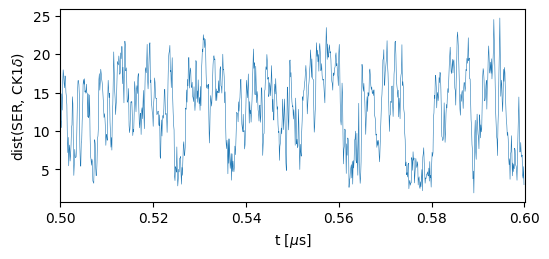

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:27<00:00, 3695.21it/s]


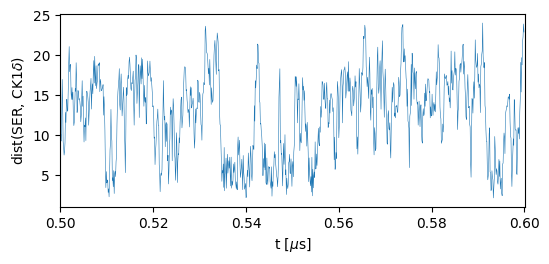

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4150.28it/s]


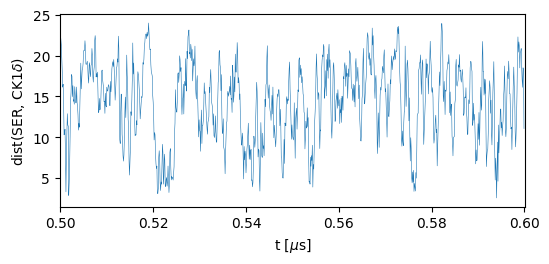

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4183.58it/s]


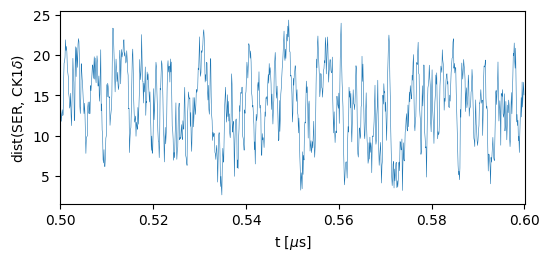

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3824.79it/s]


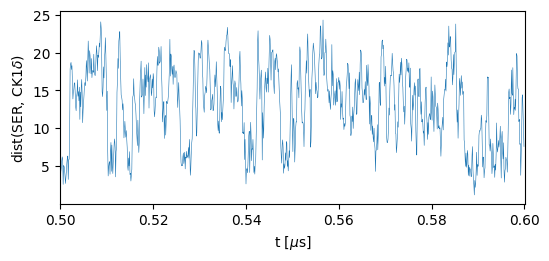

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:29<00:00, 3396.34it/s]


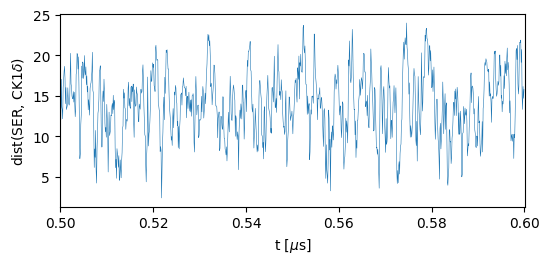

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:50<00:00, 1977.57it/s]


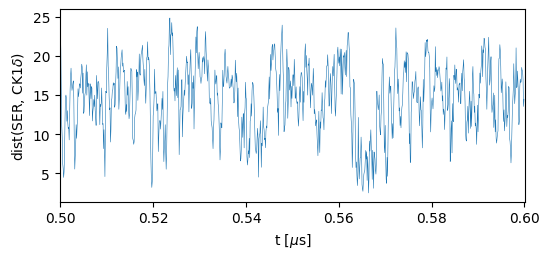

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:25<00:00, 3862.66it/s]


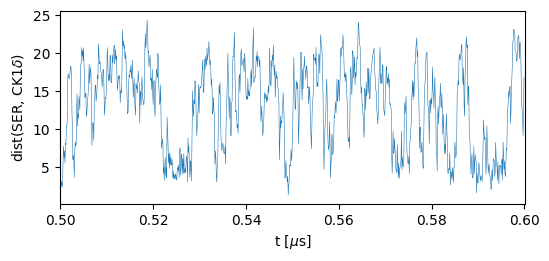

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:24<00:00, 4130.36it/s]


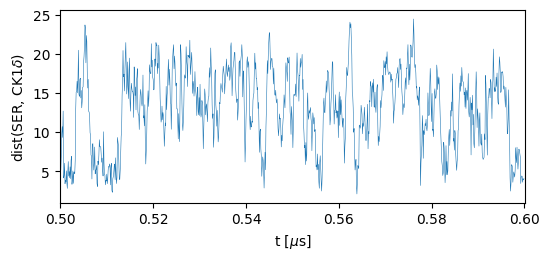

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4248.33it/s]


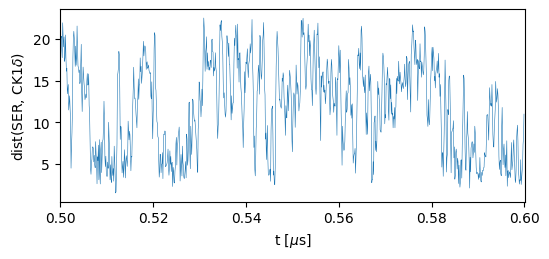

In [25]:
for s in range(1,11):
    d = hpau.create_distance_file(path_ness+f'sim_ser19_dmu-10_1-tdp43-5pser_1-ck1d-open_10k/sim{s}_ser19_dmu-10_1-tdp43-5pser_com-ck1d-open_CAL3_10k_10us_dump.gsd', 
                                         id1=[300,301,302], id2=[i for i in range(154)], mean1=True, therm=0)
    np.savetxt(path_ness+f'sim_ser19_dmu-10_1-tdp43-5pser_1-ck1d-open_10k/sim{s}_ser19_dmu-10_1-tdp43-5pser_com-ck1d-open_CAL3_10k_10us_dist.txt', d)
    hpapl.plot_dist(d,part_id=5,start=5000,end=6000)

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2998.91it/s]


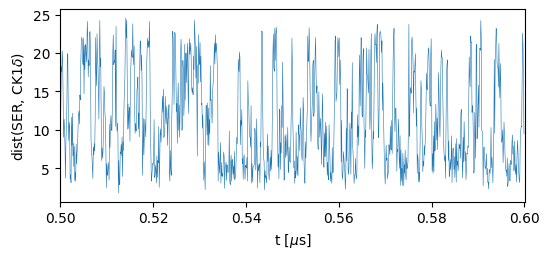

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2900.20it/s]


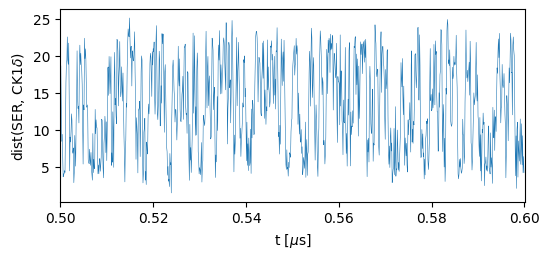

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2761.23it/s]


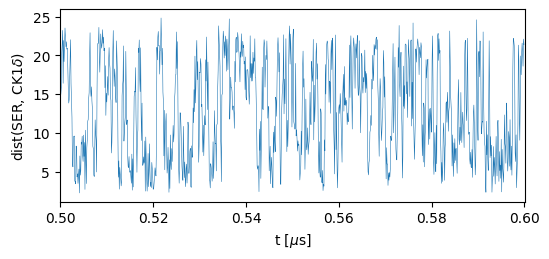

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2738.36it/s]


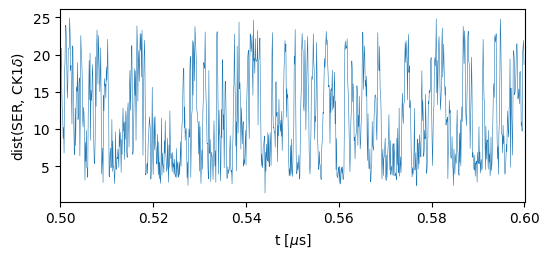

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2912.87it/s]


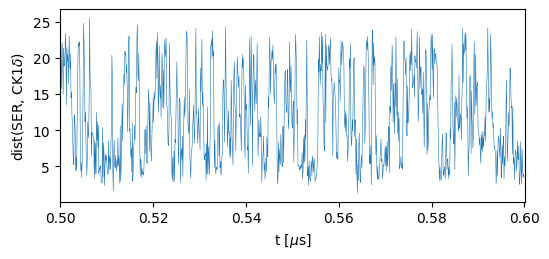

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2888.72it/s]


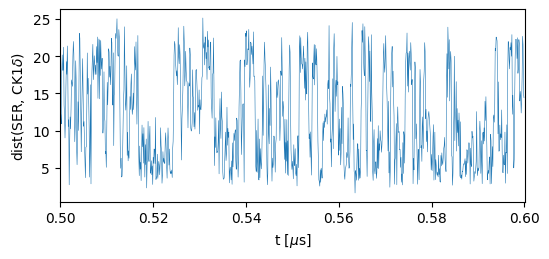

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2968.80it/s]


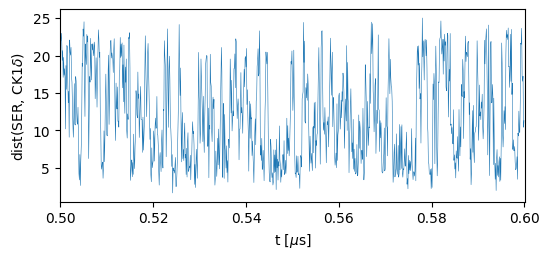

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2657.54it/s]


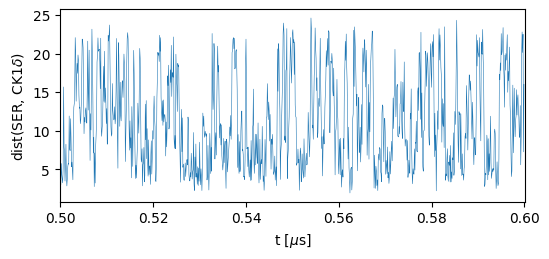

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2511.92it/s]


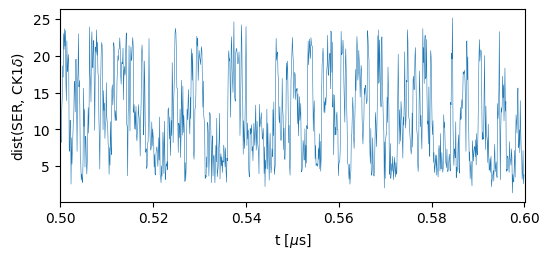

100%|█████████████████████████████████████████████████████████████| 12000/12000 [00:04<00:00, 2898.65it/s]


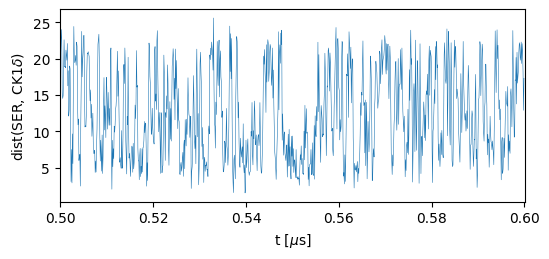

In [8]:
for s in range(1,11):
    d = hpau.create_distance_file(path_fix+f'sim_ser19_dmu-5_0_1-tdp43-5pser_1-ck1d-open_1-pp3_fixed/sim{s}_ser19_dmu-5_0_1-tdp43-5pser_com-ck1d-open_com-pp3_fixed_CAL3_dump.gsd', 
                                         id1=[300,301,302], id2=[i for i in range(154)], mean1=True, therm=0)
    tmp = hpau.create_distance_file(path_fix+f'sim_ser19_dmu-5_0_1-tdp43-5pser_1-ck1d-open_1-pp3_fixed/sim{s}_ser19_dmu-5_0_1-tdp43-5pser_com-ck1d-open_com-pp3_fixed_CAL3_dump.gsd', 
                                         id1=[445+92,445+94,445+120,445+152,445+283], id2=[i for i in range(154)], mean1=True, therm=0)
    d = np.append(d, tmp, axis=1)
    np.savetxt(path_fix+f'sim_ser19_dmu-5_0_1-tdp43-5pser_1-ck1d-open_1-pp3_fixed/sim{s}_ser19_dmu-5_0_1-tdp43-5pser_com-ck1d-open_com-pp3_fixed_CAL3_dist.txt', d)
    hpapl.plot_dist(d,part_id=5,start=5000,end=6000)